In [7]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from scipy.stats import f_oneway

In [11]:
df = pd.read_csv('/content/Crop_recommendation.csv')
df.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [12]:
df.tail()

,N,P,K,temperature,humidity,ph,rainfall,label
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee
2199,104,18,30,23.603016,60.396475,6.779833,140.937041,coffee


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


**Dataset Overview:**

**Composition**: The dataset comprises 2200 entries with 8 columns. These columns include N (Nitrogen), P (Phosphorus), K (Potassium), temperature, humidity, pH, rainfall, and label (type of crop).






**Data Representation:** Each row in the dataset represents different conditions and the type of crop grown under those conditions.







**Data Types:** The dataset includes a mix of both integer and floating-point data types.








**Data Quality:** There are no null values in any of the columns, indicating a complete dataset with no missing information.



In [14]:
df.select_dtypes(include=['int64','float64']).describe()

,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


**Summary Statistics:**





**Nutrient Levels:** The levels of nutrients like Nitrogen (N), Phosphorus (P), and Potassium (K) vary widely, indicating a diverse range of crop nutrient requirements.







**Temperature:** The dataset shows a temperature range from 8.83°C to 43.68°C, indicating it covers a broad spectrum of climatic conditions.






**Humidity:** Humidity in the dataset varies between 14.26% and 99.98%, signifying a wide array of environmental conditions.





**pH Levels:** pH levels range from 3.50 to 9.94, encompassing conditions from acidic to alkaline soil types.





**Rainfall:** Rainfall measurements vary from 20.21 mm to 298.56 mm, suggesting the dataset includes crops with diverse water requirements.

## Data Visualization

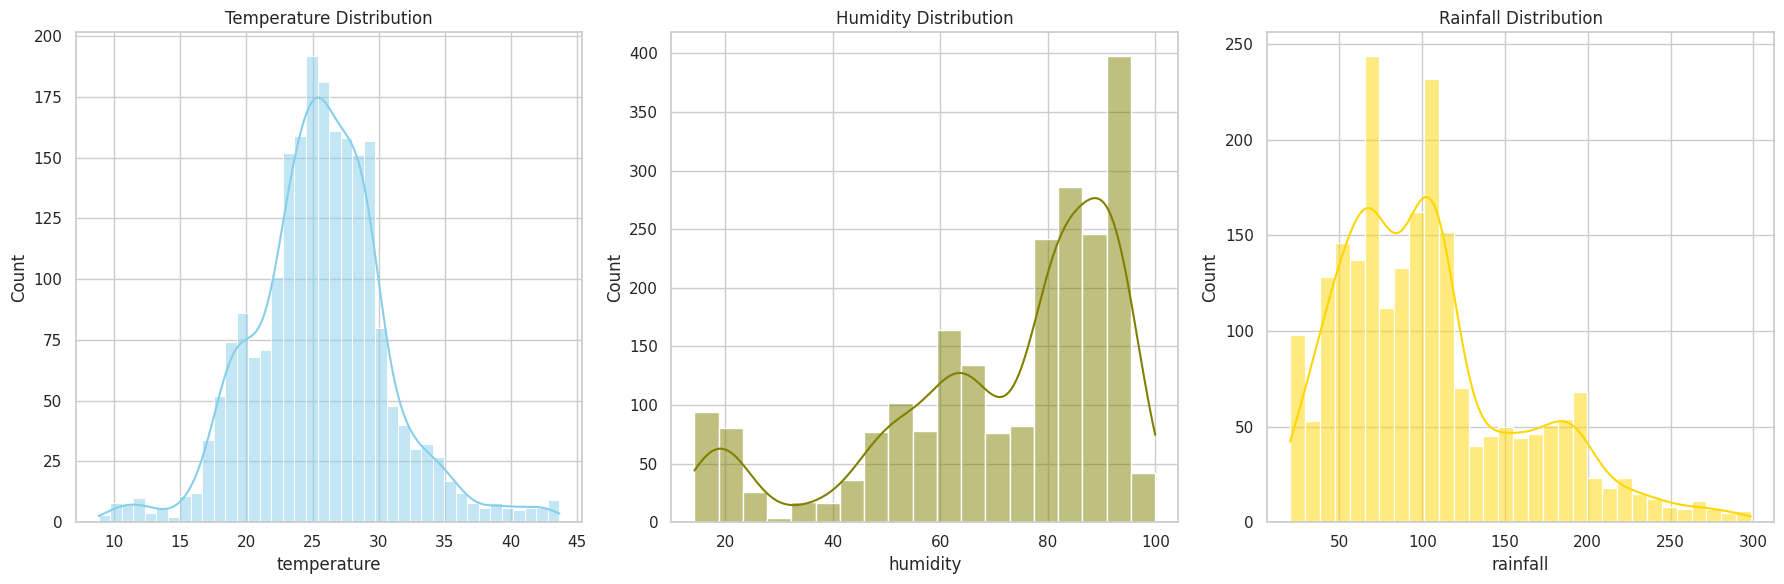

In [21]:
# setting the aesthetic style of the plots
sns.set(style='whitegrid')

#creating visualization for temprature,humidity and rainfall.
fig, axes = plt.subplots(1,3, figsize=(18,6))

#temprature distribution
sns.histplot(df['temperature'], kde=True, color='skyblue', ax=axes[0])
axes[0].set_title('Temperature Distribution')

#humidity distribution
sns.histplot(df['humidity'], kde=True, color='olive', ax=axes[1])
axes[1].set_title("Humidity Distribution")

#Rainfall Distribution
sns.histplot(df['rainfall'], kde=True, color='gold', ax=axes[2])
axes[2].set_title('Rainfall Distribution')

plt.tight_layout()
plt.show()

**Data Distributions Overview:**





**Temperature Distribution:** This histogram illustrates the distribution of temperature across the dataset. The data appears to be fairly normally distributed, signifying a wide range of temperatures suitable for different crops.










**Humidity Distribution:** The histogram for humidity demonstrates a wide range, with a slight skewness towards higher humidity levels.











**Rainfall Distribution:** The distribution of rainfall is skewed, suggesting that most crops in the dataset are cultivated in regions with moderate to high rainfall.









These visualizations are instrumental in understanding the environmental conditions under which various crops are grown in the dataset.

## ANOVA Analysis for Humidity

In [23]:
crop_types = df['label'].unique()
humidity_lists = [df[df['label'] == crop]['humidity'] for crop in crop_types]
anova_result_humidity = f_oneway(*humidity_lists)
anova_result_humidity

F_onewayResult(statistic=np.float64(3103.708891217502), pvalue=np.float64(0.0))


**Results:**




**F-Statistic:** The F-Statistic is 3103.71, which indicates a significant variance ratio between the different crops' humidity levels.




**P-Value:** The P-Value is 0.0, which is extremely small.





**Interpretation:**

The extremely low P-Value suggests that there are statistically significant differences in the average humidity levels for different crops. This indicates that crops vary significantly in their preference for environmental humidity.

These results highlight the importance of humidity as a factor in agricultural crop selection and cultivation.

## ANOVA Analysis for Rainfall

In [27]:
crop_types = df['label'].unique()
rainfall_lists = [df[df['label'] == crop]['rainfall'] for crop in crop_types]
anova_result_rainfall = f_oneway(*rainfall_lists)
anova_result_rainfall

F_onewayResult(statistic=np.float64(605.5279661441423), pvalue=np.float64(0.0))


**Results:**



**F-Statistic:** The F-Statistic is 605.53, showing a high variance ratio between the different crops' rainfall levels.




**P-Value:** The P-Value is 0.0, indicating a statistically significant difference.




**Interpretation:**

The extremely low p-value strongly suggests significant differences in the average rainfall requirements for different crops. This highlights the importance of rainfall in determining the suitability of crops for specific regions.

## Anova Analysis for Temperature

In [28]:
# Ensure crop_types is defined from your DataFrame 'df'
crop_types = df['label'].unique()

# Preparing a list of temperature values for each crop type
temperature_lists = [df[df['label'] == crop]['temperature'] for crop in crop_types]

# Performing the ANOVA test for temperature
anova_result_temperature = f_oneway(*temperature_lists)

anova_result_temperature

F_onewayResult(statistic=np.float64(102.18698122995393), pvalue=np.float64(4.019323818173197e-305))


**Results:**




**F-Statistic:** The F-Statistic is 102.19, indicating a significant variance ratio between different crops' temperature levels.





**P-Value:** The P-Value is approximately 4.02e-305, which is extremely small.






**Interpretation:**

The low p-value suggests that there are statistically significant differences in the average temperature preferences for different crops. This indicates that temperature is a critical factor in crop selection and cultivation.

**Final Insights**
As we conclude our analysis, we've gathered important insights that can inform precision agriculture practices.

**Actionable Insights**

**Humidity, Rainfall, and Temperature:** The ANOVA tests demonstrate that these environmental factors significantly influence crop selection. Understanding how they impact different crops is key to optimizing choices for specific environmental conditions.




**Statistical Significance**

The low p-values from our ANOVA tests offer high confidence in the statistical significance of our findings. This emphasizes the critical role of these environmental factors in crop cultivation decisions.





**Recommendations**

It is recommended that precision agriculture practices heavily consider these environmental factors when advising on crop selection.





**Future Research**



Further studies could explore the interaction effects between these factors, leading to more nuanced and precise recommendations.

This comprehensive analysis not only facilitates improved crop selection strategies but also makes a significant contribution to the broader field of agricultural data science.